## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
#Importing relevant packages 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import kstest

#Importing to use if needed
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D


import warnings


In [2]:
# Importing Dataset 
kc_df = pd.read_csv("data/kc_house_data.csv")
kc_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

The dataset contains 30155 rows with 25 columns. Datatypes for the columns include integers, floats and objects.

- The following columns have missing values: heat_source (33) and sewer_system (14). Due to the low amount of missing values, these rows will be dropped as these make up a very minimal percentage of the dataset. 


In [4]:
# Dropping missing values 
kc_df.dropna(inplace = True)

In [5]:
# Checking for duplicates using the id column
duplicates = kc_df[kc_df.duplicated(
subset = "id")]
print(duplicates.shape)
duplicates.head()


(1, 25)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


There is only one row that contains duplicated data. We can drop this one row. 

In [6]:
# Dropping duplicated row
kc_df.drop_duplicates(subset="id", keep="first", inplace=True)


In [7]:
# Using .shape to check for number of rows and columns
print(kc_df.shape)

# Using .info() to check out columns, datatypes and to check for dropped values
print(kc_df.info())

# Checking value_counts of variables 
for col in kc_df:
    print(kc_df[col].value_counts(), "\n")

(30110, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  

The dataset now contains 30110 rows with 25 columns and no missing values. Datatypes for the columns include integers, floats and objects. 

- Ten columns have their datatypes as objects while 15 are numeric.

- The grade column mixes two datatypes in which it has a numeric value(formatted as a string) and an object (as a string).

- Waterfront, greenbelt, nuisance, view, condition, heat_source, and sewer_system all have categorical data.

- The view column has five different categories: NONE, AVERAGE, GOOD, EXCELLENT, FAIR. In this column, it seems 26,589 rows (88.2% of the dataset) are categorized as NONE. 

- Sqft_basement has 15,471 entries with a value of 0. This is roughly 51.3% of the dataset. It may be useful to change this variable to a categorical variable indicating if there is a basement or not (YES/NO). YES if the value is greater than 0 and NO if the value is 0. 

- Sqft_garage and sqft_patio are similar to to sqft_basement and could be simplified to a catergorical variable utilizing YES/NO. 

- Looking at the value_counts above we see that 39 houses have 0 bedrooms. We would expect every house to have at least 1 bedroom. With 39 being a very small percentage of the dataset we could drop these rows. 

- Looking at the value_counts above we see that 30 houses have less than 1 (either 0 or 0.5) bathrooms.  We would expect every house to have at least 1 full bathroom. With 30 being a very small percentage of the dataset we could drop these rows


In [8]:
# Dropping rows with bathrooms and bedrooms less than 1
kc_df = kc_df[kc_df["bedrooms"] >= 1]
kc_df = kc_df[kc_df["bathrooms"] >= 1]
print(kc_df["bedrooms"].value_counts(), kc_df["bathrooms"].value_counts())

print(kc_df.info())

3     12743
4      9588
2      3924
5      2794
6       498
1       378
7        80
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 2.5     8471
2.0     7342
1.0     4541
3.0     4116
3.5     2264
1.5     1806
4.0      643
4.5      531
5.0      145
5.5      102
6.0       45
6.5       25
7.0       12
7.5       12
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30062 non-null  int64  
 1   date           30062 non-null  object 
 2   price          30062 non-null  float64
 3   bedrooms       30062 non-null  int64  
 4   bathrooms      30062 non-null  float64
 5   sqft_living    30062 non-null  int64  
 6   sqft_lot       30062 non-null  int64  
 7   floors         30062 non-null  float64
 

After dropping rows with bathroom and bedroom totals less than one, the dataset now has 30062 entries. 

In [9]:
# Checking general statistics of dataset 
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.006200e+04,3.006200e+04,30062.000000,30062.000000,30062.000000,3.006200e+04,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000
mean,4.539516e+09,1.108769e+06,3.419899,2.338550,2114.614330,1.660457e+04,1.543044,1811.144701,477.145200,330.809394,217.694332,1975.153749,90.806999,47.328463,-121.318416
std,2.882569e+09,8.938315e+05,0.972436,0.885519,972.460457,5.951967e+04,0.566942,877.234560,579.829633,285.682708,245.385208,32.041445,416.226781,1.433399,5.725870
min,1.000055e+06,2.736000e+04,1.000000,1.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070475e+09,6.495000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405378,-122.325979
50%,3.875000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.478000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551443,-122.225558
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056250e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669889,-122.116404
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Looking over the initial general statistics here are a few quick insights into the data:

- The average price of a house in King county is approximately 1,108,769 USD with the median price being 860,000 USD, the maximum price being 30,750,000 USD and the minimum price being 27,360 USD. The standard deviation of the price is 893,831.50 USD.

- The average square foot of living space (sqft_living) of a house in King Count is approximately 2114.61 square feet with the median being 1920.00 square feet, the maximum being 15,360 square feet, the minimum being 3 square feet and the standard deviation being 972.46 . The minimum being 3 square feet does not seem like it would be correct and may be an error. This warrants more investigation into that lower value.

- The average number of bedrooms of a house in King County is 3.42 bedrooms, with the median number of bedrooms being 3, the maximum number of bedrooms being 13 and the minimum number being 1 (after dropping rows with bedroom totals less than 1). The standard deviation is 0.97. 

- The average number of bathrooms of a house in King County is 2.34 bathrooms, with the median number of bathrooms being 2.5, the maximum number of bathrooms being 10.5 and the minimum number now being 1 (after dropping rows with bathrooms totals less than 1). The standard deviation is 0.885.  

- The average number of floors of a house in King County is 1.54 floors, with the median number being 1.5, the maximum number being 4 and the minimum number being 1. The standard deviation is 0.567. 

In [10]:
# Making copy of current df 
kc_copy = kc_df.copy()

In [11]:
kc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30062 non-null  int64  
 1   date           30062 non-null  object 
 2   price          30062 non-null  float64
 3   bedrooms       30062 non-null  int64  
 4   bathrooms      30062 non-null  float64
 5   sqft_living    30062 non-null  int64  
 6   sqft_lot       30062 non-null  int64  
 7   floors         30062 non-null  float64
 8   waterfront     30062 non-null  object 
 9   greenbelt      30062 non-null  object 
 10  nuisance       30062 non-null  object 
 11  view           30062 non-null  object 
 12  condition      30062 non-null  object 
 13  grade          30062 non-null  object 
 14  heat_source    30062 non-null  object 
 15  sewer_system   30062 non-null  object 
 16  sqft_above     30062 non-null  int64  
 17  sqft_basement  30062 non-null  int64  
 18  sqft_g

## Data Preparation

In [12]:
# Using One-Hot Encoding for columnc waterfront, greenbelt, nuisance 
kc_encoded = pd.get_dummies(kc_copy, columns= ['waterfront', 'greenbelt', 'nuisance'])


In [13]:
kc_encoded.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,yr_renovated,address,lat,long,waterfront_NO,waterfront_YES,greenbelt_NO,greenbelt_YES,nuisance_NO,nuisance_YES
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,Good,...,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,1,0,1,0,1,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,...,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,1,0,1,0,0,1
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,...,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,1,0,1,0,1,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,...,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,1,0,1,0,1,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,Average,...,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,1,0,1,0,0,1


In [14]:
#Dropping dummie columns for NO, remaming YES columns
#Columns will now represent 1 = YES or has feature and 0 = NO or does not have feature
kc_encoded.drop(columns= ['waterfront_NO', 'greenbelt_NO', 'nuisance_NO'], inplace = True)
kc_encoded.rename(columns={'waterfront_YES': 'Waterfront', 
                           'greenbelt_YES': 'Greenbelt', 
                           'nuisance_YES':'Nuisance'}, inplace= True)
kc_encoded.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,Waterfront,Greenbelt,Nuisance
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,Good,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0,0,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0,0,1
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0,0,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0,0,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,Average,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0,0,1


In [15]:
# Checking value counts to confirm data
print(kc_encoded['Waterfront'].value_counts())
print(kc_df['waterfront'].value_counts())

0    29556
1      506
Name: Waterfront, dtype: int64
NO     29556
YES      506
Name: waterfront, dtype: int64


In [16]:
print(kc_encoded.info())
for col in kc_encoded:
    print(kc_encoded[col].value_counts(), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30062 non-null  int64  
 1   date           30062 non-null  object 
 2   price          30062 non-null  float64
 3   bedrooms       30062 non-null  int64  
 4   bathrooms      30062 non-null  float64
 5   sqft_living    30062 non-null  int64  
 6   sqft_lot       30062 non-null  int64  
 7   floors         30062 non-null  float64
 8   view           30062 non-null  object 
 9   condition      30062 non-null  object 
 10  grade          30062 non-null  object 
 11  heat_source    30062 non-null  object 
 12  sewer_system   30062 non-null  object 
 13  sqft_above     30062 non-null  int64  
 14  sqft_basement  30062 non-null  int64  
 15  sqft_garage    30062 non-null  int64  
 16  sqft_patio     30062 non-null  int64  
 17  yr_built       30062 non-null  int64  
 18  yr_ren

In [17]:
for column in kc_encoded.columns:
    print(f"Unique values in column '{column}': \n{kc_encoded[column].unique()}")
    print(f"Values distribution '{column}': \n{kc_encoded[column].value_counts()}\n")

Unique values in column 'id': 
[7399300360 8910500230 1180000275 ... 7960100080 2781280080 9557800100]
Values distribution 'id': 
6632900607    1
2026059180    1
1423089049    1
3892500020    1
7321900035    1
             ..
691000015     1
2251500240    1
5253300275    1
5149300370    1
9430110210    1
Name: id, Length: 30062, dtype: int64

Unique values in column 'date': 
['5/24/2022' '12/13/2021' '9/29/2021' '12/14/2021' '8/24/2021' '7/20/2021'
 '11/17/2021' '4/28/2022' '3/17/2022' '6/21/2021' '6/1/2022' '6/11/2021'
 '6/25/2021' '11/15/2021' '8/26/2021' '3/28/2022' '6/16/2021' '3/23/2022'
 '3/24/2022' '9/28/2021' '10/19/2021' '2/28/2022' '12/28/2021'
 '11/19/2021' '11/4/2021' '10/8/2021' '5/4/2022' '2/26/2022' '9/7/2021'
 '9/13/2021' '8/18/2021' '8/20/2021' '8/16/2021' '4/11/2022' '11/3/2021'
 '3/2/2022' '6/29/2021' '4/1/2022' '11/20/2021' '8/25/2021' '3/16/2022'
 '7/9/2021' '3/22/2022' '6/14/2021' '11/12/2021' '11/5/2021' '6/23/2021'
 '7/22/2021' '6/2/2022' '5/19/2022' '5/3/2022' 

Next columns to address are view, condition, grade, heat_source, sewer_system, sqft_basement, sqft_garage, sqft_patio

In [25]:
#Using Custom Mapping to map catergories to numeric values 
# in columns view, condition, heat_source, and sewer_system from 

mapping_view = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}
mapping_condition = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
mapping_heat_source = {'Gas': 1, 'Oil': 2, 'Electricity': 3, 'Gas/Solar': 11, 'Electricity/Solar': 33, 
                       'Oil/Solar': 22, 'Other': 0}
mapping_sewer_system = {'PUBLIC': 1, 'PRIVATE': 2, 'PRIVATE RESTRICTED': 22, 'PUBLIC RESTRICTED': 11}

#mapping the numeric values to column categories
kc_encoded['view_encoded'] = kc_encoded['view'].map(mapping_view)
kc_encoded['condition_encoded'] = kc_encoded['condition'].map(mapping_condition)
kc_encoded['heat_source_encoded'] = kc_encoded['heat_source'].map(mapping_heat_source)
kc_encoded['sewer_system_encoded'] = kc_encoded['sewer_system'].map(mapping_sewer_system)

#viewing new columns

kc_encoded.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,address,lat,long,Waterfront,Greenbelt,Nuisance,view_encoded,condition_encoded,heat_source_encoded,sewer_system_encoded
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,Good,...,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0,0,0,0,3,1,1
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,...,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0,0,1,2,2,2,1
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,...,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0,0,0,2,2,1,1
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,...,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0,0,0,2,2,1,1
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,Average,...,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0,0,1,0,2,3,1


## Distribution of Target: "Price"

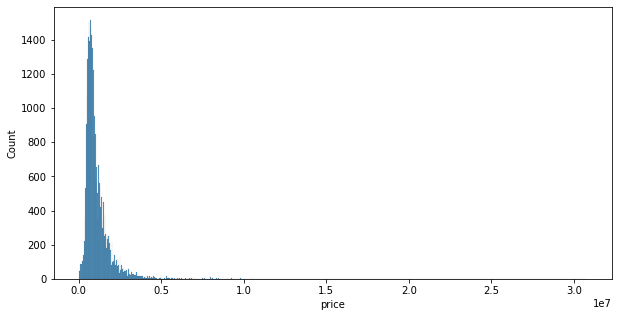

In [41]:
#Plotting a histogram to check the distribution of the price
plt.figure(figsize=(10,5))
sns.histplot(kc_encoded['price'])  
plt.show()